# Data Augmentation with Keras

This notebook demonstrate how to generate data augmentation for a given dataset using Tensorflow and Keras.

## Requirements

Import dependencies.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Check if the expected version of Tensorflow is installed.

In [3]:
print('tensorflow version: ', tf.__version__)
assert tf.__version__ == '2.3.0'

tensorflow version:  2.3.0


## ImageDataGenerator Class

Two functions are defined below to avoid code duplication among the different types of data augmentation.

In [72]:
def get_samples():
    image = tf.keras.preprocessing.image.load_img('bird.jpg')
    data = tf.keras.preprocessing.image.img_to_array(my_image)
    samples = np.expand_dims(data, 0)
    return samples

def plot_random_images(iterator, num_images = 9):
    for i in range(num_images):
        plt.subplot(330 + 1 + i)
        batch = iterator.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
    plt.show()    

### Horizontal Shift Augmentation

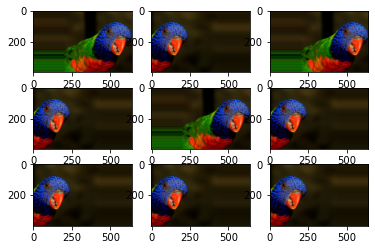

In [68]:
samples = get_samples()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=[-200, 200])
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

### Vertical Shift Augmentation

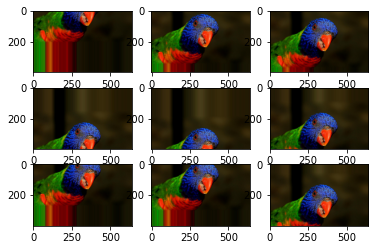

In [69]:
samples = get_samples()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.5)
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

### Horizontal Flip Augmentation

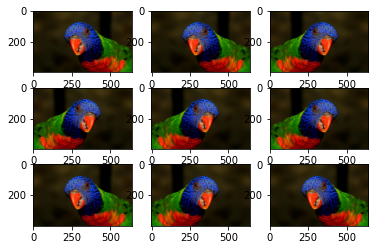

In [70]:
samples = get_samples()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

### Rotation Augmenation

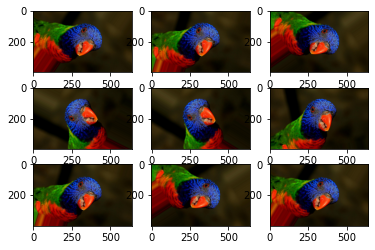

In [74]:
samples = get_samples()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=90)
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

### Brightness Augmentation

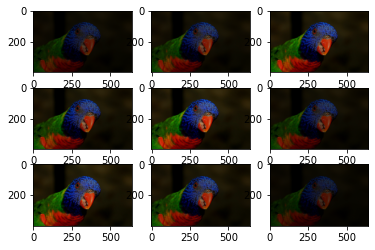

In [77]:
samples = get_samples()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.2, 1.0])
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

### Zoom Augmentation

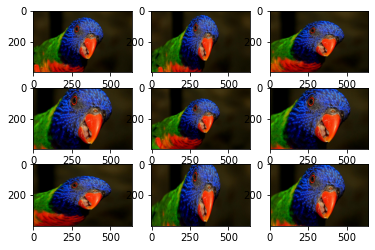

In [85]:
samples = get_samples()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.5, 1.0])
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

## Data Generators

Defines a small batch size to optimize memory for the scope of this dummy example.

In [4]:
BATCH_SIZE = 5

The `ImageDataGenerator` returns a generator that randomly apply several transformations as specified in the `datagenerator_args` dictionary, such as: horizontal flips and rotations up to 90 degrees.

In [5]:
datagenerator_args = {
    "featurewise_center": True,
    "featurewise_std_normalization": True,
    "shear_range": 0,
    "zoom_range": 0,
    "rotation_range": 90,
    "horizontal_flip": True
}
train_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(**datagenerator_args)
test_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(**datagenerator_args)

The `flow_from_directory` function reads the images from a given location on the hard drive with no random shuffling, which is important to ensure that images and masks correspond with one another. Each image is read in as 512 x 512 pixels and the batch size is a constant for demonstration purposes.

In [6]:
image_generator = \
    train_datagenerator.flow_from_directory('s2cloudless_imagery',\
                                            target_size=(512, 512),
                                            batch_size=BATCH_SIZE,
                                            class_mode=None,
                                            seed=111,
                                            shuffle=False)
mask_generator = \
    test_datagenerator.flow_from_directory('s2cloudless_label_imagery',\
                                            target_size=(512, 512),
                                            batch_size=BATCH_SIZE,
                                            class_mode=None,
                                            seed=111,
                                            shuffle=False)

Found 111 images belonging to 2 classes.
Found 40 images belonging to 1 classes.


In [7]:
train_generator = (pair for pair in zip(image_generator, mask_generator))

Generate the first batch of pairs (images and masks).

In [12]:
x, y = next(train_generator)

Display the dimensions of the first pair on the batch.

In [9]:
print('image size: ', np.shape(np.max(x[0], axis=2)))
print('mask size: ', np.shape(np.max(y[0], axis=2)))

image size:  (512, 512)
mask size:  (512, 512)


The function below applies some transformations in order to make the mask more appealing.

In [93]:
def get_pair(i):
    image = x[i].astype('uint8') / 255
    mask = np.max(y[i], axis=2) / 255
    mask[mask >= 0.5]  = 1
    mask[mask < 0.5] = 0
    mask = np.stack((mask,) * 3, axis=-1)
    return np.concatenate([image, mask], axis = 1)

Dispaly all pairs of the first batch for comparison.

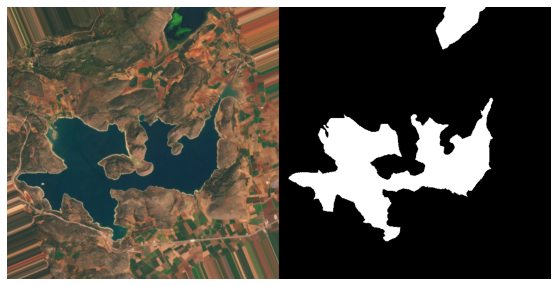

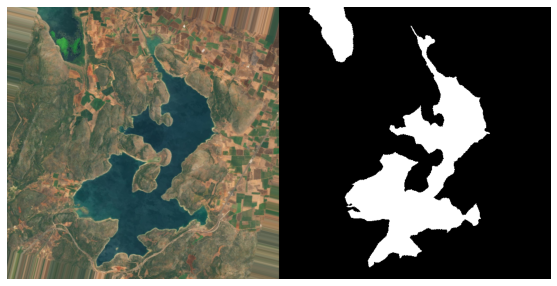

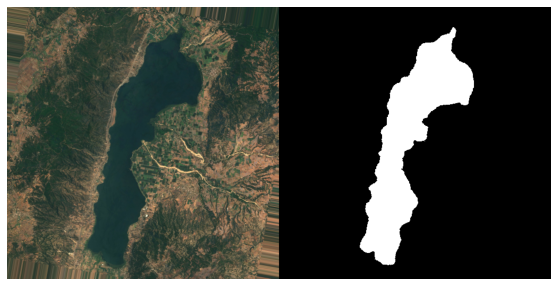

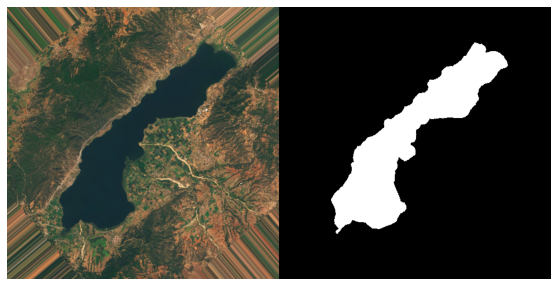

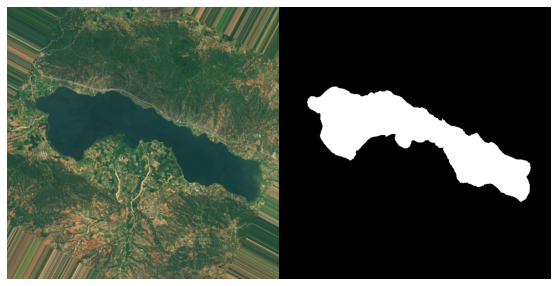

In [94]:
for i in range(BATCH_SIZE):
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(get_pair(i))